# Lab2: Simple Recurrent Network Models for Experimental Predictions

Submitted by: S4456580 - Shray Juneja 


## Part 1: Recreating Mirman et al.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/imports2')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed, Flatten
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import SGD

import random
import numpy as np 

from matplotlib import pyplot as plt 

from mirman_utils import LensParser, Binarizer, multi_plot

In [3]:
## fillin _ with the correct parameter 
model = Sequential([
    SimpleRNN( 8, input_shape=(None, 20),
              return_sequences= True,
              activation='tanh',
              name='hidden'),
    TimeDistributed(Dense(20, activation='softmax', name='output'))
  ])

model.compile(loss= 'categorical_crossentropy', 
              optimizer=SGD(lr= 0.05, momentum=0.9),
              metrics=['categorical_accuracy', 'mean_squared_error'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Exercise 1
**A)**  Mirman et al. paper investigated the connection between statistical learning with word learning in infants and adults, respectively. It is revealed that SRN are sensitive to both frequency and transitional probability. Frequency is easier to learn, however probability is more powerful. Studies have shown that both adults and infants are prone to learn novel object lables better when the labels consist of high probability syllable transitions than low probability transition. It is also shown that infants learned word labels more quickly than partwords or non words labels. In adults, learning of word labels was much faster than part word labels and learning was equally fast in word and nonword labels. Infants learned the word labels but not the part words or non labels and  adults learned all the three labels. These results obtained from various studies have no formal account of the word learnings along with effects of transitional probabilities over word learning. 
 
**B)** Simulation 2 actually provides an insight into a link between statistical learning and referential word learning. It evaluates whether the way SRN learns transitional probabilities affects learning of words, partwords and non-word labels. Also, the simulation explores the causes of transitional probability effects on label learning. The main motive behind this is to develop a formal account of these effects.
 
 **C)** The results obatined from Simulation 2 compliments the human results in following ways:
  1) The model clearly shows the advantage of learning of words over partwords as observed in the behavioral human results(infants and adults). The error rate of word labels was clearly low than partword labels as it was better at mapping input sequences to the unique objects when the sequences had high probabilities in the exposure phase compared to when they have low probabilities.
  2) Simulation 2 also tested two types of nonwords. The results add that the novel-syallable nonword were learned more slowly than words, partwords or novel-sequence nonword lables.
  3) The model results also provides a formal account that syllable involved in higher tranisitional probability sequences have more distinct phonological representation because of which infant and adults are better at learning labels with high transitional probability.

### Exercise 2
 
**A)** In the exposure phase, 10 out of 20 input syllabels are used to train the model. The particular number 1000 is achived due to the formation of data for input to the model. In order to train the model, 100 repititions of five two syllabel words are concatenated into pseudo- random continuous syllable sequence with the constraint that no word occurred twice in succession. The input data to the model in the form of pseudo random continuous syllable resulting the number 1000.



**B)** The network,s output activation will be set accordingly to the input it receives and to the label it belongs. In this case, [4,9] should be mapped to label 13 so the activation of the connection 13 to the output will be set high and all others to low . Whenever there will be a presence of [4,9], the connection with high activation will be excitory or fired, in this case 13, and all other will be inhibitory or will not be fired. Similarly, model sets the activation of all the connections accordingly through learning of the input data.


**C)** The two non word data files conatins two different types of novel non words. After obvserving the given data files, it can be conculded that the file with name 'NWc35' contains novel-sequences nonwords which are syllable transition never encountered in the exposure phase. This is due to the fact that the file is composed of syllable transitions or in novel pairings.



    name: {2} 2
    I:  {   1} 2
    T:  {   1} 11
    I:  {   1} 5
    T:  {   1} 11
    ;



The given example is taked from the file, it can be observed that model was never exposed to such syllbale transition from 2 to 11 in the expose phase. The model is exposed to different syllable transition  but never in this condition. Therefore, this gives rise to new syllable transitions making it a novel sequence non words.

On the other hand, the file 'NW35' contains novel syllables. For example:



    name: {2} 2
    I:  {   1} 18
    T:  {   1} 11
    I:  {   1} 15
    T:  {   1} 11
    ;

The above sample is completely new to the model and contains words with syllables that model has never seen. The model is trained on 10 syllables out of 20 and these non words contain syllable that the model was not exposed to making it novel- syllable non words(new syllables).




In [4]:
acc =[]
mse=[]
loss =[]
parser = LensParser()
bnzer = Binarizer(vocab_size=20)


exposure_data = parser.parse_sequence('./exposureSet2Syll35.ex')

    # inspect the first 10 tokens of the sequence
print(exposure_data[:10])

X_exposure, y_exposure = bnzer.binarize_sequence(exposure_data)

# inspect one-hot representations. Everything looks fine?
print(X_exposure.shape, y_exposure.shape)
print('-' * 48)
print(X_exposure[:,:10])
print('-' * 48)
print(y_exposure[:,:10])

exposure_phase = model.fit(X_exposure, y_exposure, epochs=75, verbose=2)
acc.append(exposure_phase.history['categorical_accuracy'][-1])
loss.append(exposure_phase.history['loss'][-1])
mse.append(exposure_phase.history['mean_squared_error'][-1])

print('Average accuracy over 10 runs: ' + str(np.mean(acc)))
print('Average loss over 10 runs: '   +str(np.mean(loss)))
print('Average MSE over 10 runs: '   +str(np.mean(mse)))
postexposure_weights = model.get_weights()



[6, 0, 3, 7, 1, 2, 4, 9, 8, 5]
(1, 1000, 20) (1, 1000, 20)
------------------------------------------------
[[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]]
------------------------------------------------
[[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 

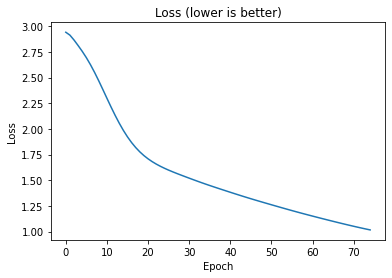

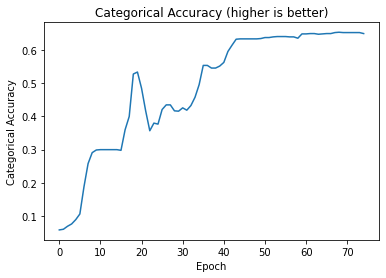

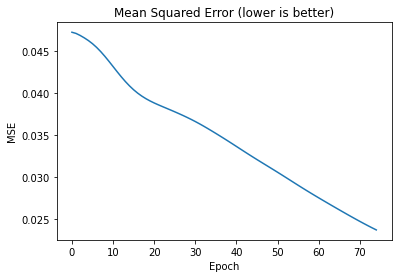

In [5]:

plt.plot(exposure_phase.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_phase.history['categorical_accuracy'])
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_phase.history['mean_squared_error'])
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

### Exercise 3:

**A)** The model was trained multiple times to get a low error rate. Training was carried out for 75 epochs and the results obtained are shown above. The graphs of loss and mean squared error depicts that both the metrics decreases with each epoch and reaches nearly zero. Final loss and error of the model observed is 1.0164 and 0.0237 respectively. Similarly, accuracy of the model increases and reaches 65.00% accuracy by the end of the training. 

**B)** In the paper, the model was reported to be trained for 75 epochs. The sufficiency of the model was evaluated with half of the training epochs reported in the paper. The results obtained after training the model for 37 epochs are shown below.According to the results, the loss and error achieved by the end of the training (37 epochs) was slightly high than obtained previously when trained for 75 epochs. The loss and error of the model was 1.4499 and 0.0325. The model accuracy was also below par by almost 7% with only 59.50%. In my opinion, the model was not properly trained to achieve high performance and half of the training mentioned in the paper is not sufficient.



[6, 0, 3, 7, 1, 2, 4, 9, 8, 5]
(1, 1000, 20) (1, 1000, 20)
------------------------------------------------
[[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]]
------------------------------------------------
[[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 - 3s - loss: 3.1557 - categorical_accuracy: 0.0240 - mean_squared_error: 0.0483 - 3s/epoch - 3s/step
Epoch 2/37
1/1 - 0s - loss: 3.1312 - categorical_accuracy: 0.0380 - mean_squared_error: 0.0482 - 414ms/epoch - 414ms/step
Epoch 3/37
1/1 - 1s - loss: 3.0882 - categorical_accuracy: 0.0590 - mean_squared_error: 0.0480 - 511ms/epoch - 511ms/step
Epoch 4/37
1/1 - 0s - loss: 3.0377 - categorical_accuracy: 0.0690 - mean_squared_error: 0.0477 - 416ms/epoch - 416ms/step
Epoch 5/37
1/1 - 0s - loss: 2.9880 - categorical_accuracy: 0.0760 - mean_squared_error: 0.0474 - 372ms/epoch - 372ms/step
Epoch 6/37
1/1 - 0s - loss: 2.9414 - categorical_accuracy: 0.0880 - mean_squared_error: 0.0472 - 158ms/epoch - 158ms/step
Epoch 7/37
1/1 - 0s - loss: 2.8975 - categorical_accuracy: 0.0950 - mean_squared_error: 0.0470 - 120ms/epoch - 120ms/step
Epoch 8/37
1/1 - 0s - loss: 2.8557 - categorical_accuracy: 0.1100 - mean_squared_error: 0.0468 - 139ms/epoch - 139ms/step
Epoch 9/37
1/1 - 0s - loss: 2.8150 - cate

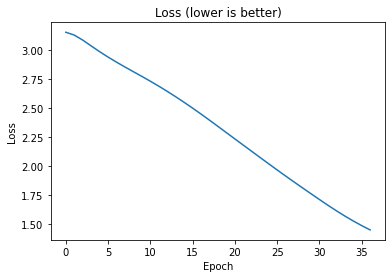

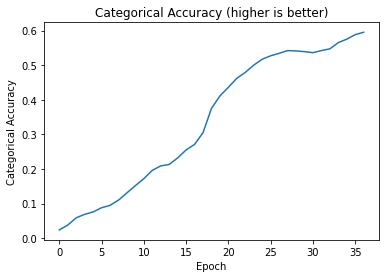

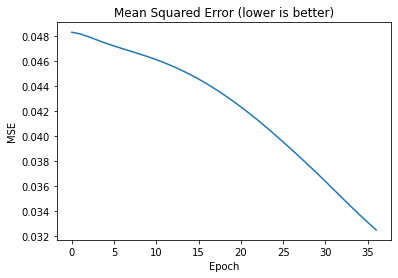

In [11]:

model2 = Sequential([
    SimpleRNN( 8, input_shape=(None, 20),
              return_sequences= True,
              activation='tanh',
              name='hidden'),
    TimeDistributed(Dense(20, activation='softmax', name='output'))
  ])
model2.compile(loss= 'categorical_crossentropy', 
              optimizer=SGD(lr= 0.05, momentum=0.9),
              metrics=['categorical_accuracy', 'mean_squared_error'])

parser2 = LensParser()
bnzer2 = Binarizer(vocab_size=20)


exposure_data2 = parser.parse_sequence('./exposureSet2Syll35.ex')

    # inspect the first 10 tokens of the sequence
print(exposure_data2[:10])

X_exposure2, y_exposure2 = bnzer.binarize_sequence(exposure_data2)

# inspect one-hot representations. Everything looks fine?
print(X_exposure2.shape, y_exposure2.shape)
print('-' * 48)
print(X_exposure2[:,:10])
print('-' * 48)
print(y_exposure2[:,:10])

exposure_phase2 = model2.fit(X_exposure2, y_exposure2, epochs=37, verbose=2)


plt.plot(exposure_phase2.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_phase2.history['categorical_accuracy'])
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_phase2.history['mean_squared_error'])
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()



In [6]:
# load words label data for label learning phase
word_labels = parser.parse_labels('./labelSet2SyllW35.ex')

# inspect the data. Are they the same as in the input files?
print('Word labels={}'.format(word_labels))

# generate 100 training word examples
word_data = random.choices(word_labels, k=100)
print('First 5 word label examples={}'.format(word_data[:5]))

# convert to one-hot encodings
Xw, yw = bnzer.binarize_labels(word_data)

# inspect the input data shape. Make sense?
print('Word data shape={}, labels shape={}'.format(Xw.shape, yw.shape))

model.set_weights(postexposure_weights)
words_learning = model.fit(Xw, yw, epochs=100, verbose=2)



Word labels=[(1, 2, 10), (8, 5, 11), (6, 0, 12), (4, 9, 13), (3, 7, 14)]
First 5 word label examples=[(1, 2, 10), (8, 5, 11), (6, 0, 12), (4, 9, 13), (3, 7, 14)]
Word data shape=(1, 200, 20), labels shape=(1, 200, 20)
Epoch 1/100
1/1 - 1s - loss: 6.0510 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0646 - 590ms/epoch - 590ms/step
Epoch 2/100
1/1 - 0s - loss: 5.9496 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0647 - 26ms/epoch - 26ms/step
Epoch 3/100
1/1 - 0s - loss: 5.7310 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0645 - 33ms/epoch - 33ms/step
Epoch 4/100
1/1 - 0s - loss: 5.3949 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0635 - 26ms/epoch - 26ms/step
Epoch 5/100
1/1 - 0s - loss: 4.9567 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0614 - 25ms/epoch - 25ms/step
Epoch 6/100
1/1 - 0s - loss: 4.5121 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0591 - 27ms/epoch - 27ms/step
Epoch 7/100
1/1 - 0s - loss: 4

In [7]:
# load part - words label data for label learning phase
word_labels = parser.parse_labels('./labelSet2SyllPW35.ex')

# inspect the data. Are they the same as in the input files?
print('Word labels={}'.format(word_labels))

# generate 100 training word examples
word_data = random.choices(word_labels, k=100)
print('First 5 word label examples={}'.format(word_data[:5]))

# convert to one-hot encodings
Xw, yw = bnzer.binarize_labels(word_data)

# inspect the input data shape. Make sense?
print('Word data shape={}, labels shape={}'.format(Xw.shape, yw.shape))

model.set_weights(postexposure_weights)
part_words_learning = model.fit(Xw, yw, epochs=100, verbose=2)

Word labels=[(2, 8, 10), (5, 6, 11), (0, 4, 12), (9, 3, 13), (7, 1, 14)]
First 5 word label examples=[(5, 6, 11), (2, 8, 10), (2, 8, 10), (5, 6, 11), (7, 1, 14)]
Word data shape=(1, 200, 20), labels shape=(1, 200, 20)
Epoch 1/100
1/1 - 0s - loss: 6.3367 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0645 - 30ms/epoch - 30ms/step
Epoch 2/100
1/1 - 0s - loss: 6.2172 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0644 - 30ms/epoch - 30ms/step
Epoch 3/100
1/1 - 0s - loss: 5.9767 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0639 - 41ms/epoch - 41ms/step
Epoch 4/100
1/1 - 0s - loss: 5.6079 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0626 - 30ms/epoch - 30ms/step
Epoch 5/100
1/1 - 0s - loss: 5.1672 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0600 - 25ms/epoch - 25ms/step
Epoch 6/100
1/1 - 0s - loss: 4.7631 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0581 - 27ms/epoch - 27ms/step
Epoch 7/100
1/1 - 0s - loss: 4.3

In [8]:
# load novel syllable words label data for label learning phase
word_labels = parser.parse_labels('./labelSet2SyllNW35.ex')

# inspect the data. Are they the same as in the input files?
print('Word labels={}'.format(word_labels))

# generate 100 training word examples
word_data = random.choices(word_labels, k=100)
print('First 5 word label examples={}'.format(word_data[:5]))

# convert to one-hot encodings
Xw, yw = bnzer.binarize_labels(word_data)

# inspect the input data shape. Make sense?
print('Word data shape={}, labels shape={}'.format(Xw.shape, yw.shape))

model.set_weights(postexposure_weights)
non_words_learning = model.fit(Xw, yw, epochs=100, verbose=2)

Word labels=[(11, 12, 10), (18, 15, 11), (16, 10, 12), (14, 19, 13), (13, 17, 14)]
First 5 word label examples=[(16, 10, 12), (18, 15, 11), (18, 15, 11), (18, 15, 11), (11, 12, 10)]
Word data shape=(1, 200, 20), labels shape=(1, 200, 20)
Epoch 1/100
1/1 - 0s - loss: 5.7612 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0581 - 26ms/epoch - 26ms/step
Epoch 2/100
1/1 - 0s - loss: 5.4255 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0561 - 27ms/epoch - 27ms/step
Epoch 3/100
1/1 - 0s - loss: 5.1529 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0558 - 28ms/epoch - 28ms/step
Epoch 4/100
1/1 - 0s - loss: 4.7062 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0550 - 29ms/epoch - 29ms/step
Epoch 5/100
1/1 - 0s - loss: 4.0812 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0531 - 26ms/epoch - 26ms/step
Epoch 6/100
1/1 - 0s - loss: 3.5955 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0514 - 32ms/epoch - 32ms/step
Epoch 7/100


In [9]:
# load novel syllable sequence nonwords label data for label learning phase
word_labels = parser.parse_labels('./labelSet2SyllNWc35.ex')

# inspect the data. Are they the same as in the input files?
print('Word labels={}'.format(word_labels))

# generate 100 training word examples
word_data = random.choices(word_labels, k=100)
print('First 5 word label examples={}'.format(word_data[:5]))

# convert to one-hot encodings
Xw, yw = bnzer.binarize_labels(word_data)

# inspect the input data shape. Make sense?
print('Word data shape={}, labels shape={}'.format(Xw.shape, yw.shape))

model.set_weights(postexposure_weights)
non_words_c_learning = model.fit(Xw, yw, epochs=100, verbose=2)

Word labels=[(1, 8, 10), (2, 5, 11), (6, 4, 12), (0, 9, 13), (7, 3, 14)]
First 5 word label examples=[(0, 9, 13), (2, 5, 11), (0, 9, 13), (0, 9, 13), (2, 5, 11)]
Word data shape=(1, 200, 20), labels shape=(1, 200, 20)
Epoch 1/100
1/1 - 0s - loss: 5.9203 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0613 - 40ms/epoch - 40ms/step
Epoch 2/100
1/1 - 0s - loss: 5.6682 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0599 - 25ms/epoch - 25ms/step
Epoch 3/100
1/1 - 0s - loss: 5.3974 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0583 - 30ms/epoch - 30ms/step
Epoch 4/100
1/1 - 0s - loss: 5.1406 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0579 - 24ms/epoch - 24ms/step
Epoch 5/100
1/1 - 0s - loss: 4.8173 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0574 - 30ms/epoch - 30ms/step
Epoch 6/100
1/1 - 0s - loss: 4.4410 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0568 - 24ms/epoch - 24ms/step
Epoch 7/100
1/1 - 0s - loss: 4.0

### Exercise 4

**A)** Non-syllable nonwords were basically composed of 10 input syllable that the model not been exposed to. In other words, all the syllable are novel to the model. The purpose of including non-syllable nonwords was to examine and compare the syllable familiarity on label learning when the sequence is completely novel syllables (novel-syllable nonwords) and partly novel nonwords (novel-sequence). 
 
**B)** In the label learning phase, the model should be initialized with postexposure weights to achieve maximum balance between the label learning conditions. The motive of the experminemt is to examine the label learning with words, partwords, and two types of nonwords on the same weights of the model computed in the exposure phase of the process. If this inititialization process is not carried out, then the model will be trained not only on exposure dataset but also on words, partwords etc and will gain much insight of the data resulting in failure of the experiment.

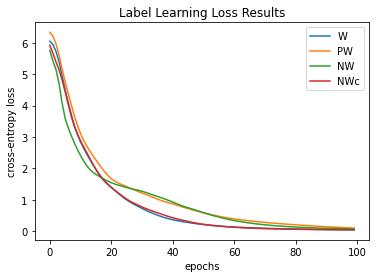

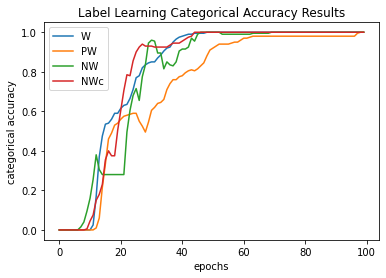

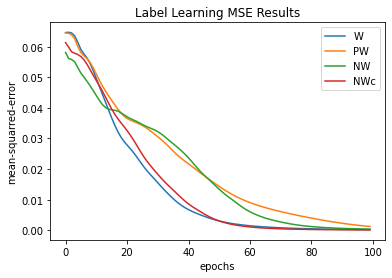

In [10]:
losses = [words_learning.history['loss'], part_words_learning.history['loss'], \
          non_words_learning.history['loss'], non_words_c_learning.history['loss']]

accuracies = [words_learning.history['categorical_accuracy'], \
              part_words_learning.history['categorical_accuracy'], \
              non_words_learning.history['categorical_accuracy'], \
              non_words_c_learning.history['categorical_accuracy']]


MSEs = [words_learning.history['mean_squared_error'], \
        part_words_learning.history['mean_squared_error'], \
        non_words_learning.history['mean_squared_error'], \
        non_words_c_learning.history['mean_squared_error']]


multi_plot(losses, accuracies, MSEs)

**C)** The comparison graph for the different label learning catgories are visualized above and it resembles the results reported in the paper. It can be clearly concluded that the model was able to learn all the label categories with high accuracy. As the process continues, it is observable that error for word labels decreases significantly and more quickly than all other label categories.By contrast, novel syllable nonword labels were learned slowly as compared to all label categories. In the case of novel syllable sequence label learning, from the graph, it is seen that learning is as faster than partwords but slower than words. 

 The only difference observed is our model's ability to learn label categories of partwords. Error curve of partwords shows a corss over with than novel syllable sequence word error curve and converges much slower than expecte or reported in the paper.
 
**D)** After observing the given distinction between adult-child reusults in the human experiments and our model's resultsm, it can be stated that or SRN model simulates adults behvioral learning. This can be clearified by our model results as just like adults, our model learns all the categories. The results also depicts that model learned word labels more quickly than partword labels similar to adult learning behvaioral. Also, infants were unable to learn part words or non words which proves that our model simulates adults.

## Part 2: Modelling Misyak et al. (2010)

In [6]:
import itertools

all_tokens = [
 'pel',
 'dak',
 'vot',
 'rid',
 'jic',
 'tood',
 'wadim',
 'kicey',
 'puser',
 'fengle',
 'coomo',
 'loga',
 'gople',
 'taspu',
 'hiftam',
 'deecha',
 'vamey',
 'skiger',
 'benez',
 'gensim',
 'feenam',
 'laelijeen',
 'chila',
 'roosa',
 'plizet',
 'balip',
 'malsig',
 'suleb',
 'nilbo',
 'wiffle'
]

start_tokens = all_tokens[:3]  ## {a,b,c}
end_tokens = all_tokens[3:6]   ## {d,e,f}
middle_tokens = all_tokens[6:] ## {X1,...,X24}


grammar_map = {
    'pel' : 'rid',   ## a->d
    'dak' : 'jic',   ## b->e
    'vot' : 'tood'   ## c->f
}

In [7]:
def generate_grammatical_block():
    return [(*r, grammar_map[r[0]]) for r in itertools.product(start_tokens, middle_tokens)]

# let's inspect a generated block. Does it look grammatical according to the paper? 
print(generate_grammatical_block())

[('pel', 'wadim', 'rid'), ('pel', 'kicey', 'rid'), ('pel', 'puser', 'rid'), ('pel', 'fengle', 'rid'), ('pel', 'coomo', 'rid'), ('pel', 'loga', 'rid'), ('pel', 'gople', 'rid'), ('pel', 'taspu', 'rid'), ('pel', 'hiftam', 'rid'), ('pel', 'deecha', 'rid'), ('pel', 'vamey', 'rid'), ('pel', 'skiger', 'rid'), ('pel', 'benez', 'rid'), ('pel', 'gensim', 'rid'), ('pel', 'feenam', 'rid'), ('pel', 'laelijeen', 'rid'), ('pel', 'chila', 'rid'), ('pel', 'roosa', 'rid'), ('pel', 'plizet', 'rid'), ('pel', 'balip', 'rid'), ('pel', 'malsig', 'rid'), ('pel', 'suleb', 'rid'), ('pel', 'nilbo', 'rid'), ('pel', 'wiffle', 'rid'), ('dak', 'wadim', 'jic'), ('dak', 'kicey', 'jic'), ('dak', 'puser', 'jic'), ('dak', 'fengle', 'jic'), ('dak', 'coomo', 'jic'), ('dak', 'loga', 'jic'), ('dak', 'gople', 'jic'), ('dak', 'taspu', 'jic'), ('dak', 'hiftam', 'jic'), ('dak', 'deecha', 'jic'), ('dak', 'vamey', 'jic'), ('dak', 'skiger', 'jic'), ('dak', 'benez', 'jic'), ('dak', 'gensim', 'jic'), ('dak', 'feenam', 'jic'), ('dak',

In [8]:


non_grammar_map = {
    'pel' : ['jic', 'tood'],
    'dak' : ['rid', 'tood'],
    'vot' : ['rid', 'jic']
}

def generate_ungrammatical_block(num_strings=24):
    a = []
    f = 0
    for r in itertools.product(start_tokens, middle_tokens):
        if f == 0:
            b= (*r, non_grammar_map[r[0]][0])
            a.append(b)
            f = 1
        elif f == 1:
            b = (*r, non_grammar_map[r[0]][1])
            a.append(b)
            f = 0
    ag = a[0:8]  + a[32:40] +  a[64:72]
    return ag

print(generate_ungrammatical_block())



[('pel', 'wadim', 'jic'), ('pel', 'kicey', 'tood'), ('pel', 'puser', 'jic'), ('pel', 'fengle', 'tood'), ('pel', 'coomo', 'jic'), ('pel', 'loga', 'tood'), ('pel', 'gople', 'jic'), ('pel', 'taspu', 'tood'), ('dak', 'hiftam', 'rid'), ('dak', 'deecha', 'tood'), ('dak', 'vamey', 'rid'), ('dak', 'skiger', 'tood'), ('dak', 'benez', 'rid'), ('dak', 'gensim', 'tood'), ('dak', 'feenam', 'rid'), ('dak', 'laelijeen', 'tood'), ('vot', 'chila', 'rid'), ('vot', 'roosa', 'jic'), ('vot', 'plizet', 'rid'), ('vot', 'balip', 'jic'), ('vot', 'malsig', 'rid'), ('vot', 'suleb', 'jic'), ('vot', 'nilbo', 'rid'), ('vot', 'wiffle', 'jic')]


In [9]:
from sklearn.preprocessing import LabelBinarizer

# generate one grammatical block of 72 strings, one ungrammatical of default 24 strings
# and one "recovery" block of 72 grammatical strings
gram_block = random.sample(generate_grammatical_block(), 72)
ungr_block = random.sample(generate_ungrammatical_block(), 24)
rec_block = random.sample(generate_grammatical_block(), 72)

# define an one-hot encoder
encoder = LabelBinarizer()
encoder.fit(all_tokens)

# flatten the strings and transform all tokens to one-hot vectors
gram_tokens = [token for tokens in gram_block for token in tokens]
ungr_tokens = [token for tokens in ungr_block for token in tokens]
rec_tokens = [token for tokens in rec_block for token in tokens]

gram_vectors = encoder.transform(gram_tokens)
ungr_vectors = encoder.transform(ungr_tokens)
rec_vectors = encoder.transform(rec_tokens)

# define training data and targets by shifting the sequence one token to the left 
X_gram = gram_vectors[np.newaxis, :]
y_gram = np.append(gram_vectors[1:], gram_vectors[:1], axis=0)[np.newaxis, :]

X_ungr = ungr_vectors[np.newaxis, :]
y_ungr = np.append(ungr_vectors[1:], ungr_vectors[:1], axis=0)[np.newaxis, :]

X_rec = rec_vectors[np.newaxis, :]
y_rec = np.append(rec_vectors[1:], rec_vectors[:1], axis=0)[np.newaxis, :]

# what is the shape of our data? Does this match descriptions in the paper?
print(X_gram.shape, y_gram.shape, X_ungr.shape, y_ungr.shape, X_rec.shape, y_rec.shape)

(1, 216, 30) (1, 216, 30) (1, 72, 30) (1, 72, 30) (1, 216, 30) (1, 216, 30)


In [22]:
## fillin _ with the correct parameter 
def mod():
  modell = Sequential([
    SimpleRNN( 15, input_shape=(None, 30),
              return_sequences=True,
              activation='tanh',
              recurrent_initializer= RandomUniform(minval = -1, maxval=1),
              name='hidden'),
    TimeDistributed(Dense(30, activation='softmax', name='output'))
  ])

  modell.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.1, momentum=0.8),
              metrics=['categorical_accuracy', 'mean_squared_error'])
  return modell

model3 = mod()
scale_factor = 5
print(model3.summary())
print('-'*100)
print('Phase 1: 6 grammatical blocks of 72 strings..\n')
phase_1 = model3.fit(X_gram, y_gram, epochs=6*scale_factor, verbose=2)
print('-'*100)

print('Phase 2: 1 ungrammatical block of 24 strings..\n') 
phase_2 = model3.fit(X_ungr, y_ungr, epochs=1*scale_factor, verbose=2)
print('-'*100)

print('Phase 3: 1 recovery block of 72 strings..\n')
phase_3 = model3.fit(X_rec, y_rec, epochs=1*scale_factor, verbose=2)
print('-'*100)
loss = phase_1.history['loss'] + phase_2.history['loss'] + phase_3.history['loss'] 
accu = phase_1.history['categorical_accuracy'] + phase_2.history['categorical_accuracy'] \
          + phase_3.history['categorical_accuracy']
mse = phase_1.history['mean_squared_error'] + phase_2.history['mean_squared_error'] \
          + phase_3.history['mean_squared_error']




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (SimpleRNN)          (None, None, 15)          690       
                                                                 
 time_distributed_6 (TimeDis  (None, None, 30)         480       
 tributed)                                                       
                                                                 
Total params: 1,170
Trainable params: 1,170
Non-trainable params: 0
_________________________________________________________________
None
----------------------------------------------------------------------------------------------------
Phase 1: 6 grammatical blocks of 72 strings..

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 - 1s - loss: 3.7620 - categorical_accuracy: 0.0093 - mean_squared_error: 0.0331 - 862ms/epoch - 862ms/step
Epoch 2/30
1/1 - 0s - loss: 3.6907 - categorical_accuracy: 0.0139 - mean_squared_error: 0.0331 - 26ms/epoch - 26ms/step
Epoch 3/30
1/1 - 0s - loss: 3.5538 - categorical_accuracy: 0.0139 - mean_squared_error: 0.0328 - 23ms/epoch - 23ms/step
Epoch 4/30
1/1 - 0s - loss: 3.3732 - categorical_accuracy: 0.0185 - mean_squared_error: 0.0323 - 25ms/epoch - 25ms/step
Epoch 5/30
1/1 - 0s - loss: 3.1886 - categorical_accuracy: 0.0648 - mean_squared_error: 0.0317 - 24ms/epoch - 24ms/step
Epoch 6/30
1/1 - 0s - loss: 3.0362 - categorical_accuracy: 0.0972 - mean_squared_error: 0.0312 - 34ms/epoch - 34ms/step
Epoch 7/30
1/1 - 0s - loss: 2.9320 - categorical_accuracy: 0.0787 - mean_squared_error: 0.0308 - 23ms/epoch - 23ms/step
Epoch 8/30
1/1 - 0s - loss: 2.8761 - categorical_accuracy: 0.1481 - mean_squared_error: 0.0306 - 24ms/epoch - 24ms/step
Epoch 9/30
1/1 - 0s - loss: 2.8554 - categorical_

### Exercise 5:

**A)**  The weights parameters obtained after initializing the model for Misyak et al experiment is 1,170 trainable parameters in total. The size of the input layer in 30 with 15 hidden and context units. The output or dense layer contains 30 units same as the input layer. The trainable parameters(weights, bias) obtained in the hidden layer is 465 and context layer has 225 in total whereas the weights parameters in dense layer in 480. 

**B)** The loss function used in the above defined model is categorical crossentropy and the performance of the model is evaluated using two metrics namely categorical accuracy and mean sqaure error. The absolute values of these metrics represent model's learing of non-adjacent dependencies in the data. The plotted graph of loss function and metrics indicates that how well the model is able to predict end token of each string.

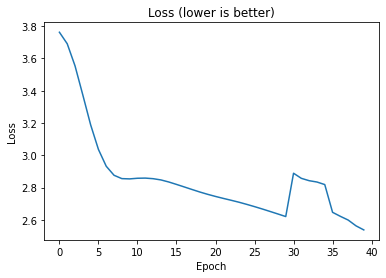

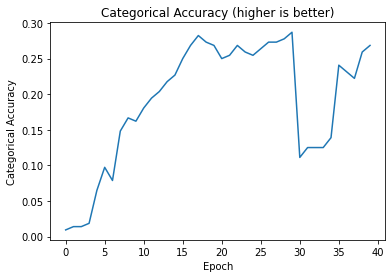

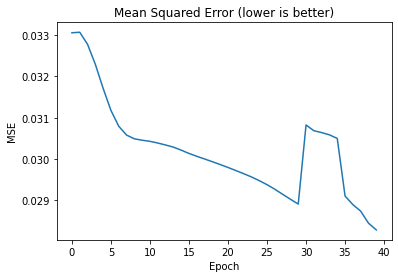

In [23]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(accu)
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(mse)
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

**C)** The report information about the error metrics after each block and the end of the training are displayed. The plots of the metrics are also visualized above. The learning proceeds in the simliar way as reported in the paper. The model begins to learn and the error decreases gradually with each epoch. Consequently, the accuracy of the model increases when model is trained with grammatical blocks.  The effect of 24 ungrammatical trials in the error can be clearly observed in the error graph above. The steep rise in the error curve after the long descent around 30 epochs indicates the ungrammaical trials in the learning process. The recovery block after the ungramatical trials are predcited with similar accuracy that of grammatical blocks. The error curve drops quickly signifying model's recovery period.

**D)** The purpose of taking mean score after 30 runs  was to corrpespond each network to a human participant. Each network was randomly initialized with different weights to approximate the learner's difference.

In [24]:
pred_block = random.sample(generate_grammatical_block(), 12)

# lets view our 12 prediction strings
print(pred_block)

[('pel', 'benez', 'rid'), ('pel', 'wadim', 'rid'), ('vot', 'taspu', 'tood'), ('pel', 'balip', 'rid'), ('dak', 'wiffle', 'jic'), ('pel', 'gensim', 'rid'), ('pel', 'chila', 'rid'), ('vot', 'gople', 'tood'), ('dak', 'loga', 'jic'), ('dak', 'nilbo', 'jic'), ('dak', 'laelijeen', 'jic'), ('dak', 'fengle', 'jic')]


In [25]:
# convert data to one-hot vectors and make model predictions
pred_tokens = [token for tokens in pred_block for token in tokens]
pred_vectors = encoder.transform(pred_tokens)
X_pred = pred_vectors[np.newaxis, :]

# decode and inspect
predictions = encoder.inverse_transform(np.array(model3.predict(X_pred)[0]))

print('12-item prediction task input tokens:\n{}'.format(pred_tokens))
print('\n12-item prediction task output predictions:\n{}'.format(predictions))

12-item prediction task input tokens:
['pel', 'benez', 'rid', 'pel', 'wadim', 'rid', 'vot', 'taspu', 'tood', 'pel', 'balip', 'rid', 'dak', 'wiffle', 'jic', 'pel', 'gensim', 'rid', 'pel', 'chila', 'rid', 'vot', 'gople', 'tood', 'dak', 'loga', 'jic', 'dak', 'nilbo', 'jic', 'dak', 'laelijeen', 'jic', 'dak', 'fengle', 'jic']

12-item prediction task output predictions:
['jic' 'jic' 'vot' 'tood' 'jic' 'vot' 'tood' 'tood' 'dak' 'jic' 'jic'
 'vot' 'tood' 'jic' 'vot' 'tood' 'jic' 'vot' 'tood' 'jic' 'vot' 'tood'
 'tood' 'dak' 'jic' 'jic' 'vot' 'tood' 'jic' 'vot' 'tood' 'jic' 'vot'
 'tood' 'jic' 'vot']


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[0.02006984, 0.037591077, 0.017924935, 0.024055837, 0.024703978, 0.031947557, 0.030823711, 0.029562276, 0.052191984, 0.015476335, 0.030292284, 0.17263256, 0.023825541, 0.030457359, 0.024764735, 0.039709143, 0.018931737, 0.018993499, 0.014819823, 0.018883223, 0.08144975, 0.038241208, 0.02023968, 0.02292851, 0.019848114, 0.0305, 0.024178725, 0.010232994, 0.033109426, 0.04161421]
[0.004823029, 0.028309569, 0.0026981782, 0.009622816, 0.04431904, 0.0060402285, 0.005925404, 0.01733149, 0.013348209, 0.005624473, 0.007936772, 0.3101349, 0.008546553, 0.012063047, 0.0033663085, 0.03831239, 0.0049495106, 0.047631137, 0.004196799, 0.005677137, 0.24728154, 0.019050378, 0.004410954, 0.010601856, 0.005883897, 0.040918738, 0.0077779167, 0.04057293, 0.019006412, 0.02363833]
[0.009290489, 0.010448891, 0.0051380773, 0.0074909665, 0.1426227, 0.008707347, 0.005438163, 0.008123529, 0.0063887765, 0.010490559, 0.009133503, 0.042287372, 0.009361749, 0.0115994, 0.006080162, 0.011905613, 0.0082297325, 0.11957914

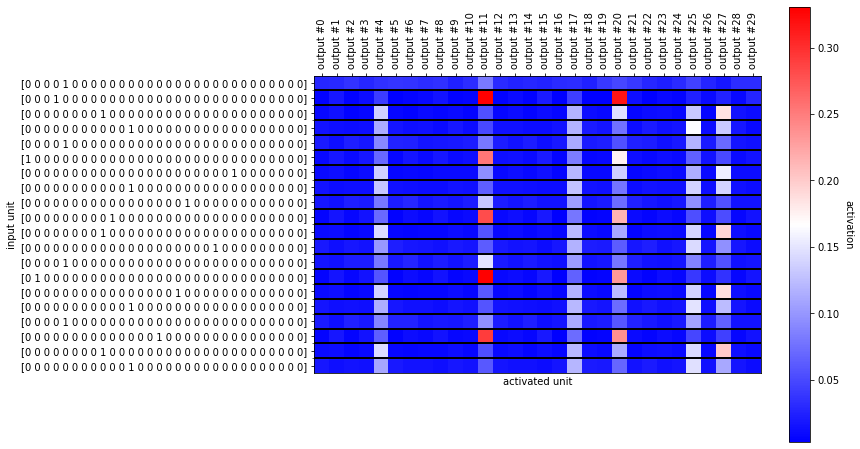

In [44]:
from plot_functions import plot_activation_matrix, get_activation_matrix

plt.figure(figsize=(10,8))
plot_activation_matrix(model3, X_gram, layers=[model3.layers[1]],
                       subset=(0, slice(0, 20), slice(None)),
                       show_values=False)

########### Luce Ratio for Prediction ###############
acti = get_activation_matrix(model3, X_pred, layers=[model3.layers[1]])
acti= acti[0]
luce_ratio = []
for i in range(36) :
  luce = []
  for j in acti[i]:
    ratio = j/np. sum(acti[i])
    luce.append(ratio)
  luce_ratio.append(luce)
for i in luce_ratio:
  print(i)

**E)** The Luce ratio difference scores to determine the network's selction is implemented in the above block. The calculation for the 12 item prediction task is displayed above.

## Part 3: Extending Misyak et al.

In [54]:
###### New traning data for the extended Misyak et al ###############
middle_tokens = all_tokens[6:]

grammar_map = {
    'pel' : 'rid',   ## a->d
    'dak' : 'jic',   ## b->e
    'vot' : 'tood'   ## c->f
}

def generate_grammatical_block():
      return [(*r, grammar_map[r[0]]) for r in itertools.product(start_tokens, middle_tokens,middle_tokens)]


print(generate_grammatical_block())

non_grammar_map = {
    'pel' : ['jic', 'tood'],
    'dak' : ['rid', 'tood'],
    'vot' : ['rid', 'jic']
}
def generate_ungrammatical_block(num_strings=24):
    a = []
    f = 0
    for r in itertools.product(start_tokens, middle_tokens,middle_tokens):
        if f == 0:
            b= (*r, non_grammar_map[r[0]][0])
            a.append(b)
            f = 1
        elif f == 1:
            b = (*r, non_grammar_map[r[0]][1])
            a.append(b)
            f = 0
    ag = a[0:192]  + a[768:960] +  a[1536:1728]
    return ag

print(generate_ungrammatical_block())





[('pel', 'wadim', 'wadim', 'rid'), ('pel', 'wadim', 'kicey', 'rid'), ('pel', 'wadim', 'puser', 'rid'), ('pel', 'wadim', 'fengle', 'rid'), ('pel', 'wadim', 'coomo', 'rid'), ('pel', 'wadim', 'loga', 'rid'), ('pel', 'wadim', 'gople', 'rid'), ('pel', 'wadim', 'taspu', 'rid'), ('pel', 'wadim', 'hiftam', 'rid'), ('pel', 'wadim', 'deecha', 'rid'), ('pel', 'wadim', 'vamey', 'rid'), ('pel', 'wadim', 'skiger', 'rid'), ('pel', 'wadim', 'benez', 'rid'), ('pel', 'wadim', 'gensim', 'rid'), ('pel', 'wadim', 'feenam', 'rid'), ('pel', 'wadim', 'laelijeen', 'rid'), ('pel', 'wadim', 'chila', 'rid'), ('pel', 'wadim', 'roosa', 'rid'), ('pel', 'wadim', 'plizet', 'rid'), ('pel', 'wadim', 'balip', 'rid'), ('pel', 'wadim', 'malsig', 'rid'), ('pel', 'wadim', 'suleb', 'rid'), ('pel', 'wadim', 'nilbo', 'rid'), ('pel', 'wadim', 'wiffle', 'rid'), ('pel', 'kicey', 'wadim', 'rid'), ('pel', 'kicey', 'kicey', 'rid'), ('pel', 'kicey', 'puser', 'rid'), ('pel', 'kicey', 'fengle', 'rid'), ('pel', 'kicey', 'coomo', 'rid'), 

In [57]:
## Model for extended Misyak et al 

model4 = Sequential([
    SimpleRNN( 15, input_shape=(None, 30),
              return_sequences=True,
              activation='tanh',
              recurrent_initializer= RandomUniform(minval = -1, maxval=1),
              name='hidden'),
    TimeDistributed(Dense(30, activation='softmax', name='output'))
])

model4.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.1, momentum=0.8),
              metrics=['categorical_accuracy', 'mean_squared_error'])

print(model4.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (SimpleRNN)          (None, None, 15)          690       
                                                                 
 time_distributed_12 (TimeDi  (None, None, 30)         480       
 stributed)                                                      
                                                                 
Total params: 1,170
Trainable params: 1,170
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


(1, 288, 30) (1, 288, 30) (1, 96, 30) (1, 96, 30) (1, 288, 30) (1, 288, 30)
----------------------------------------------------------------------------------------------------
Phase 1: 6 grammatical blocks of 72 strings..

Epoch 1/30
1/1 - 1s - loss: 3.5999 - categorical_accuracy: 0.0243 - mean_squared_error: 0.0328 - 824ms/epoch - 824ms/step
Epoch 2/30
1/1 - 0s - loss: 3.8309 - categorical_accuracy: 0.0417 - mean_squared_error: 0.0334 - 37ms/epoch - 37ms/step
Epoch 3/30
1/1 - 0s - loss: 3.6770 - categorical_accuracy: 0.0729 - mean_squared_error: 0.0330 - 35ms/epoch - 35ms/step
Epoch 4/30
1/1 - 0s - loss: 3.7355 - categorical_accuracy: 0.0417 - mean_squared_error: 0.0332 - 39ms/epoch - 39ms/step
Epoch 5/30
1/1 - 0s - loss: 3.6824 - categorical_accuracy: 0.0417 - mean_squared_error: 0.0331 - 32ms/epoch - 32ms/step
Epoch 6/30
1/1 - 0s - loss: 3.6219 - categorical_accuracy: 0.0451 - mean_squared_error: 0.0329 - 33ms/epoch - 33ms/step
Epoch 7/30
1/1 - 0s - loss: 3.5587 - categorical_accur

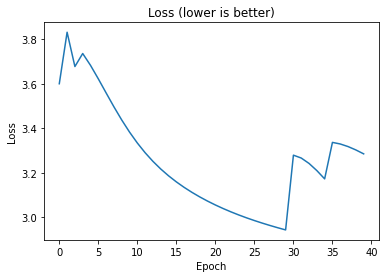

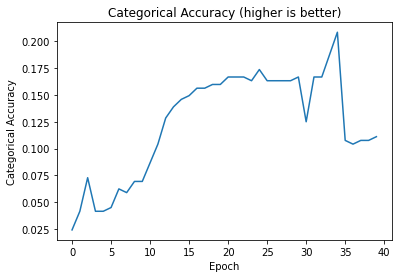

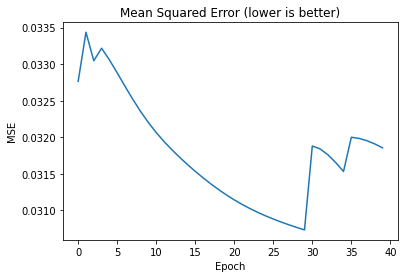

In [58]:
from sklearn.preprocessing import LabelBinarizer

# generate one grammatical block of 72 strings, one ungrammatical of default 24 strings
# and one "recovery" block of 72 grammatical strings
gram_block = random.sample(generate_grammatical_block(), 72)
ungr_block = random.sample(generate_ungrammatical_block(), 24)
rec_block = random.sample(generate_grammatical_block(), 72)

# define an one-hot encoder
encoder = LabelBinarizer()
encoder.fit(all_tokens)

# flatten the strings and transform all tokens to one-hot vectors
gram_tokens = [token for tokens in gram_block for token in tokens]
ungr_tokens = [token for tokens in ungr_block for token in tokens]
rec_tokens = [token for tokens in rec_block for token in tokens]

gram_vectors = encoder.transform(gram_tokens)
ungr_vectors = encoder.transform(ungr_tokens)
rec_vectors = encoder.transform(rec_tokens)

# define training data and targets by shifting the sequence one token to the left 
X_gram = gram_vectors[np.newaxis, :]
y_gram = np.append(gram_vectors[1:], gram_vectors[:1], axis=0)[np.newaxis, :]

X_ungr = ungr_vectors[np.newaxis, :]
y_ungr = np.append(ungr_vectors[1:], ungr_vectors[:1], axis=0)[np.newaxis, :]

X_rec = rec_vectors[np.newaxis, :]
y_rec = np.append(rec_vectors[1:], rec_vectors[:1], axis=0)[np.newaxis, :]

# what is the shape of our data? Does this match descriptions in the paper?
print(X_gram.shape, y_gram.shape, X_ungr.shape, y_ungr.shape, X_rec.shape, y_rec.shape)

scale_factor = 5

print('-'*100)
print('Phase 1: 6 grammatical blocks of 72 strings..\n')
phase_1 = model4.fit(X_gram, y_gram, epochs=6*scale_factor, verbose=2)
print('-'*100)

print('Phase 2: 1 ungrammatical block of 24 strings..\n') 
phase_2 = model4.fit(X_ungr, y_ungr, epochs=1*scale_factor, verbose=2)
print('-'*100)

print('Phase 3: 1 recovery block of 72 strings..\n')
phase_3 = model4.fit(X_rec, y_rec, epochs=1*scale_factor, verbose=2)
print('-'*100)


import matplotlib.pyplot as plt

loss = phase_1.history['loss'] + phase_2.history['loss'] + phase_3.history['loss'] 
accu = phase_1.history['categorical_accuracy'] + phase_2.history['categorical_accuracy'] \
          + phase_3.history['categorical_accuracy']
mse = phase_1.history['mean_squared_error'] + phase_2.history['mean_squared_error'] \
          + phase_3.history['mean_squared_error']


plt.plot(loss)
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(accu)
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(mse)
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

### Exercise:6

**A)** The input to the extended model was modified in such a way that now there are two words in the middle position instead of one . The laerning curve of the model can be visualized above. The model learns and error decreases on the grammatical block with two middle words. The process of learning and error metrics develop quite differently in block 6,7 and 8. It can be observed from the error graph, error curve fluctuates by the end of the training before setlling at a high value.

**B)** The prediciton capacity of the extended model can be compared to the model build earlier. Both the model depicts learning in the early stage when the model is inputted with grammatical blocks. The error curve of both the model's graph decreases gradually. The significant difference can be seen around and after 30 epochs in both the graphs. In the extended model, the error curve fluctuates and finally settle at a high value stating disrupted learning. On the other side, the error curve in the previous model increases and returns back to its original state in the recovery period showing model has strongly learned dependencies in the data.

**C)** SRNs will only one context layer can learn more than just one step back in time but our extended SRN model was not able to learn completely. The extended model depicted rise in error in the ungrammatical block like earlier model but it was not able to rebound back or retain its original learning. In other words, activations of the model were disrupted in the presence of ungrammtical block ,therefore the model was not able to predict correctly in the recovery period.

**D)** Based on the results of the simulation, in my opinion, human subjects will be able to outperform model's learning and predict the end token of the string with higher accuracy. Especially, in the recovery period when the model fails to retain its learning and performs poorly in predcition. 